In [1]:
#importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#importing files
train = pd.read_csv('training.csv')
test = pd.read_csv('test_.csv')

In [3]:
#checking files for null values and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3464 non-null   int64 
 1   category  3464 non-null   int64 
 2   text      3464 non-null   object
dtypes: int64(2), object(1)
memory usage: 81.3+ KB


In [4]:
train.describe()

,id,category
count,3464.000000,3464.000000
mean,2965.177829,0.033487
std,1129.886851,0.179931
min,959.000000,0.000000
25%,1987.750000,0.000000
50%,2971.500000,0.000000
75%,3974.250000,0.000000
max,4855.000000,1.000000


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1360 non-null   int64 
 1   text    1360 non-null   object
dtypes: int64(1), object(1)
memory usage: 21.4+ KB


In [7]:
test.describe()

,id
count,1360.000000
mean,1090.707353
std,1091.295243
min,1.000000
25%,340.750000
50%,680.500000
75%,1453.750000
max,4103.000000


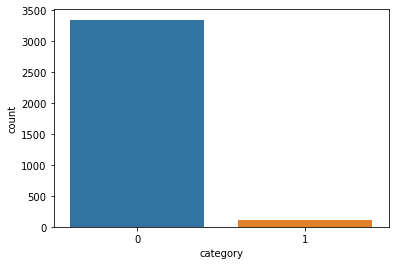

In [16]:
#checking for data ratio
import seaborn as sns
sns.countplot(x='category',data=train)
plt.show()

In [18]:
train['category'].value_counts(normalize=True)*100

0    96.65127
1     3.34873
Name: category, dtype: float64

In [8]:
#concaing test and train datasets for further manipulation
df = pd.concat([train,test])

In [9]:
# using countervectorizer for converting text data values into column 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(df.text)
vector = pd.DataFrame(counts.todense(),columns=vectorizer.get_feature_names())
vector.shape


(4824, 8593)

In [10]:
# reseting index
df.reset_index(drop = True)

,id,category,text
0,959,0.0,5573 1189 4017 1207 4768 8542 17 1189 5085 5773
1,994,0.0,6315 7507 6700 4742 1944 2692 3647 4413 6700
2,995,0.0,5015 8067 5335 1615 7957 5773
3,996,0.0,2925 7199 1994 4647 7455 5773 4518 2734 2807 8...
4,997,0.0,7136 1207 6781 237 4971 3669 6193
...,...,...,...
4819,311,NaN,3163 4030 3892 3405 1470 2893 3163 4372 4151 3...
4820,324,NaN,2336 5820 5775 5853 1392 2336 3777 5655 1355 2...
4821,329,NaN,123 4888 1158 5566 2025 2703 1241 652 4030 202...
4822,342,NaN,5120 3886 5920 5289 750 4304 2283 3747 2118 32...


In [11]:
vector.reset_index(drop = True)

,10,100,1000,1001,1002,1003,1004,1005,1006,1007,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#seprating test and train data rows
train_vec = vector[:3464]

In [13]:
test_vec = vector[3464:]

In [14]:
train.reset_index(drop=True)

,id,category,text
0,959,0,5573 1189 4017 1207 4768 8542 17 1189 5085 5773
1,994,0,6315 7507 6700 4742 1944 2692 3647 4413 6700
2,995,0,5015 8067 5335 1615 7957 5773
3,996,0,2925 7199 1994 4647 7455 5773 4518 2734 2807 8...
4,997,0,7136 1207 6781 237 4971 3669 6193
...,...,...,...
3459,4851,1,6787 5435 3515 3324 3477 7337 4234 4328 7606 5...
3460,4852,1,6787 5983 5922 1577 5658 3718 1530 4801 5658 7...
3461,4853,1,6787 3359 4108 5007 3477 4909 5342 224 6663 64...
3462,4854,1,6787 3917 4017 5573 5979 4457 4108 1226 4332 1...


In [15]:
#joining train dataset and vector of train dataset
train_df = pd.concat([train,train_vec], axis = 1)

In [19]:
# collectting only positive data so that we can upscale the data as we can se the data is not in proper ratio
ext = train_df[train_df.category == 1]

In [20]:
#we are upscaling positive ratio
train_final = pd.concat([train_df,ext,ext,ext,ext,ext,ext,ext,ext])

In [21]:
#dounsampling step
from sklearn.utils import resample

# Separating majority and minority classes
df_major = train_final[train_final.category==0]
df_minor= train_final[train_final.category==1]
 
# Downsample major class
df_majority_downsampled = resample(df_major,replace=False,n_samples=len(df_minor),random_state=123)
 
# Combining minor class with downsampled major class
dff = pd.concat([df_majority_downsampled, df_minor])
 
# Display new class counts
dff.category.value_counts(normalize = True)
dff.reset_index(inplace = True)
dff.drop(['index'], axis = 1, inplace = True)

In [23]:
#defining X, y
X = dff.drop(['category','id','text'], axis = 1)
y = dff['category']

In [24]:
# splitting data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [38]:
# making function for gridsearch cv and randomised search cv
def rand_cv(model,X_train,y_train,param_grid):
    rand = RandomizedSearchCV(estimator=model,param_distributions=param_grid,scoring='accuracy',n_iter=20,verbose=1,cv=5, n_jobs=-1)
    rand_result = rand.fit(X_train, y_train)
    print('Best Score: ', rand_result.best_score_)
    print('Best Params: ', rand_result.best_params_)

In [27]:
def scrd(model):
    cols = ['Model','ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
    models_report = pd.DataFrame(columns = cols)
    from sklearn import metrics
    model.fit(x_train,y_train)
    y2 = model.predict(x_test)
    tmp1 = pd.Series({'Model': model,
                      'ROC Score' : metrics.roc_auc_score(y_test, y2),
                     'Precision Score': metrics.precision_score(y_test, y2),'Recall Score': metrics.recall_score(y_test,y2),
                     'Accuracy Score': metrics.accuracy_score(y_test, y2),'Kappa Score':metrics.cohen_kappa_score(y_test, y2)})

    model1_report = models_report.append(tmp1, ignore_index = True)
    return model1_report

In [25]:
# using logisting regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

99.68102073365232

In [30]:
y_pred = lr.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       324
           1       0.99      1.00      1.00       303

    accuracy                           1.00       627
   macro avg       1.00      1.00      1.00       627
weighted avg       1.00      1.00      1.00       627



In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[322   2]
 [  0 303]]


In [35]:
scrd(lr)

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,LogisticRegression(),0.996914,0.993443,1.0,0.99681,0.993615


In [32]:
# Decision Tree

In [33]:
dt = DecisionTreeClassifier(random_state=42).fit(x_train,y_train)
lr.score(x_test,y_test)*100

99.68102073365232

In [37]:
scrd(dt)

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,DecisionTreeClassifier(random_state=42),0.979938,0.958861,1.0,0.979266,0.958544


In [39]:
#definig parameter grid for decision tree
param_grid = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':[1,2,3,4,5],
              'min_samples_split':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              'min_samples_leaf':[1,2,3,4,5],
              'max_features':[1,2,3,4,5,6,7,8,9,10],
              'max_leaf_nodes':[2,3,4,5,6,7,8,9,10]}

In [40]:
#using randomised Search cv for finding the best para meters
rand_cv(dt,x_train,y_train,param_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.7s finished


Best Score:  0.5304502314273691
Best Params:  {'splitter': 'random', 'min_samples_split': 0.1, 'min_samples_leaf': 1, 'max_leaf_nodes': 6, 'max_features': 7, 'max_depth': 5, 'criterion': 'gini'}


In [41]:
#applying best parameters
dt = DecisionTreeClassifier(random_state=42,splitter='random',min_samples_split=0.1,min_samples_leaf=1, max_leaf_nodes=6, max_features=7,
                           max_depth=5, criterion='gini').fit(x_train,y_train)

In [42]:
scrd(dt)

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,"DecisionTreeClassifier(max_depth=5, max_featur...",0.534653,1.0,0.069307,0.550239,0.071462


In [43]:
#random forest
forest = RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
scrd(forest)

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,"(DecisionTreeClassifier(max_features='auto', r...",1.0,1.0,1.0,1.0,1.0


In [45]:
#defining parameter list fir random forest
param_grid = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5],
              'min_samples_split':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              'min_samples_leaf':[1,2,3,4,5],
              'max_features':[1,2,3,4,5,6,7,8,9,10],
              'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10]}

In [46]:
rand_cv(forest,x_train,y_train,param_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.7s finished


Best Score:  0.8356678666604329
Best Params:  {'min_samples_split': 0.6, 'min_samples_leaf': 3, 'max_leaf_nodes': 6, 'max_features': 10, 'max_depth': 3, 'criterion': 'gini'}


In [47]:
forest = RandomForestClassifier(min_samples_split = 0.1, min_samples_leaf=1, max_leaf_nodes=9, max_features=6,
                                max_depth=5, criterion='gini').fit(x_train,y_train)

In [48]:
scrd(forest)

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.97919,0.980132,0.976898,0.979266,0.958482


In [50]:
#using Adaboost
ada = AdaBoostClassifier().fit(x_train,y_train)

In [51]:
scrd(ada)

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,"(DecisionTreeClassifier(max_depth=1, random_st...",0.996914,0.993443,1.0,0.99681,0.993615


In [53]:
#defining parameter list fir adaboost

param_grid = {'n_estimators':[131,132,133],
              'learning_rate':[0.9,1]}

In [54]:
rand_cv(ada,x_train,y_train,param_grid)

C:\Users\chuda\anaconda3\envs\Rushabh\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.0min finished


Best Score:  0.9972602739726029
Best Params:  {'n_estimators': 131, 'learning_rate': 0.9}


In [55]:
ada = AdaBoostClassifier(n_estimators=131, learning_rate=0.9)
ada.fit(x_train,y_train)
ad_data = scrd(ada)
ad_data

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,"(DecisionTreeClassifier(max_depth=1, random_st...",0.998457,0.996711,1.0,0.998405,0.996807


In [56]:
#i tried too manu combinations for the hyper parameter in that the random forest is giving me 
#the best results so i used random forest for the final prediction

In [59]:
forest = RandomForestClassifier(min_samples_split = 0.1, min_samples_leaf=1, max_leaf_nodes=9, max_features=6,
                                max_depth=5, criterion='gini').fit(X,y)

In [60]:
predict = pd.Series(forest.predict(test_vec))
predict.value_counts()

0    1307
1      53
dtype: int64

In [61]:
#converting predictions to csv file
predict.to_csv('forest56.csv')